In [1]:
import requests
import pandas as pd 
import data
import download as download 
import preprocess
from preprocess.format_data import clean_gender,clean_age,format_age,remove_nan
from preprocess.utils import df_dec,df_rea,df_hosp,df_plot_gender

In [2]:
file_name = "data/age_gender.csv"
url = "https://static.data.gouv.fr/resources/taux-dincidence-de-lepidemie-de-covid-19/20210418-191002/sp-pe-tb-heb-fra-2021-04-18-19h10.csv"
myfile = requests.get(url)
open(file_name, 'wb').write(myfile.content)
data_gender = pd.read_csv('data/age_gender.csv',sep=';')

In [6]:
file_name1 = "data/agegroups.csv"
url1 = 'https://www.data.gouv.fr/fr/datasets/r/08c18e08-6780-452d-9b8c-ae244ad529b3'
myfile = requests.get(url1)
open(file_name1, 'wb').write(myfile.content)
data_age = pd.read_csv('data/AgeGroups.csv',sep=';')


In [7]:
data_age

,reg,cl_age90,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
0,1,0,2020-03-18,0,0,NaN,NaN,NaN,0,0
1,1,9,2020-03-18,0,0,NaN,NaN,NaN,0,0
2,1,19,2020-03-18,0,0,NaN,NaN,NaN,0,0
3,1,29,2020-03-18,0,0,NaN,NaN,NaN,0,0
4,1,39,2020-03-18,0,0,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...
78601,94,59,2021-04-18,9,4,1.0,2.0,2.0,116,7
78602,94,69,2021-04-18,16,6,4.0,5.0,1.0,154,19
78603,94,79,2021-04-18,26,3,16.0,7.0,0.0,177,44
78604,94,89,2021-04-18,25,1,14.0,10.0,0.0,162,73


In [8]:
dfc = clean_age(data_age)

FileNotFoundError: [Errno 2] File data/agegaroups.csv does not exist: 'data/agegaroups.csv'

In [ ]:
dfc1 = remove_nan(dfc)
dfC = format_age(dfc1)

In [5]:
def missing(df):
    print (round((df.isnull().sum() * 100/ len(df)),2).sort_values(ascending=False))


In [6]:
missing(data_age)

autres      90.93
SSR_USLD    90.93
HospConv    90.93
dc           0.00
rad          0.00
rea          0.00
hosp         0.00
jour         0.00
cl_age90     0.00
reg          0.00
dtype: float64


In [7]:
import numpy as np
def remove_nan(df):
    numeric = df.select_dtypes(include=np.number)
    numeric_columns = numeric.columns
    df[numeric_columns] = df[numeric_columns].interpolate(method ='linear', limit_direction='forward')
    return(df)


In [8]:
remove_nan(data_age)

,reg,cl_age90,jour,hosp,rea,HospConv,SSR_USLD,autres,rad,dc
0,1,0,2020-03-18,0,0,NaN,NaN,NaN,0,0
1,1,9,2020-03-18,0,0,NaN,NaN,NaN,0,0
2,1,19,2020-03-18,0,0,NaN,NaN,NaN,0,0
3,1,29,2020-03-18,0,0,NaN,NaN,NaN,0,0
4,1,39,2020-03-18,0,0,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...
78601,94,59,2021-04-18,9,4,1.0,2.0,2.0,116,7
78602,94,69,2021-04-18,16,6,4.0,5.0,1.0,154,19
78603,94,79,2021-04-18,26,3,16.0,7.0,0.0,177,44
78604,94,89,2021-04-18,25,1,14.0,10.0,0.0,162,73


In [9]:
missing(data_age)

autres      90.93
SSR_USLD    90.93
HospConv    90.93
dc           0.00
rad          0.00
rea          0.00
hosp         0.00
jour         0.00
cl_age90     0.00
reg          0.00
dtype: float64


In [10]:
dfc = clean_age(data_age)
dfc1 = remove_nan(dfc)
dfC = format_age(dfc1)
dfC.to_csv(r'data/agegroups_cleaned.csv', index = False)

FileNotFoundError: [Errno 2] File covidstat/data/agegaroups.csv does not exist: 'covidstat/data/agegaroups.csv'

# Descriptif des variables : 

 - nb_hosp : nombre de patients hospitalisés, 
 - nb-rea :nombre de personnes actuellement en réanimation ou soins intensifs, 
- nb_hospconv :nombre de personnes actuellement en hospitalisation conventionnelle, 
- SSR_USLD : nombre de personnes actuellement en Soins de Suite et de Réadaptation (SSR) ou Unités de Soins de Longue Durée(USLD), 
- nombre actuellement de personnes hospitalisées dans un autre type de service, 
 - nombre cumulé de personnes retournées à domicile, 
 - nombre cumulé de personnes décédées.


In [50]:
data_gender.head(n=10)

,fra,week,P_f,P_h,P,pop_f,pop_h,cl_age90,pop
0,FR,2020-S21,64,56,125,3.802090e+06,3.961116e+06,9,7.763206e+06
1,FR,2020-S21,146,100,253,4.066327e+06,4.270159e+06,19,8.336486e+06
2,FR,2020-S21,306,247,556,3.736780e+06,3.740007e+06,29,7.476787e+06
3,FR,2020-S21,280,228,520,4.266384e+06,4.028988e+06,39,8.295372e+06
4,FR,2020-S21,315,256,574,4.355127e+06,4.237760e+06,49,8.592886e+06
5,FR,2020-S21,302,256,560,4.494308e+06,4.298366e+06,59,8.792675e+06
6,FR,2020-S21,189,220,412,4.209746e+06,3.794337e+06,69,8.004083e+06
7,FR,2020-S21,205,231,437,3.096658e+06,2.598981e+06,79,5.695639e+06
8,FR,2020-S21,447,225,672,1.993318e+06,1.251963e+06,89,3.245281e+06
9,FR,2020-S21,447,107,556,6.720700e+05,2.405106e+05,90,9.125806e+05


Description des données

Le présent jeu de données renseigne à l'échelle nationale :
Le taux d'incidence correspond au nombre de cas positifs au coronavirus pour 100 000 habitants. Il est calculé de la manière suivante :
(100000 * nombre de cas positif) / Population.Ce taux est calculé à partir des résultats des tests virologiques effectués.

le taux d'incidence hebdomadaire par classe d'âge et sexe;
le taux d’incidence standardisé hebdomadaire ;
le taux d'incidence standardisé glissant.


In [6]:
df = clean_gender(data_gender)

In [7]:
df1 = format_age(df)

In [38]:
df_group = df1.groupby('AgeGroup')[['num_f','num_h','P']].aggregate(lambda x: x.mean())
df_group
df_group.reset_index(inplace=True)
df_group.head(n=10)

,AgeGroup,num_f,num_h,P
0,"[0,9]",28651.734043,25174.212766,54117.074468
1,"[10,19]",6748.510638,6735.872340,13665.574468
2,"[20,39]",9408.680851,8198.361702,17649.957447
3,"[30,39]",8846.255319,7409.191489,16287.361702
4,"[40,49]",8419.170213,7238.361702,15688.404255
5,"[50,59]",7447.808511,6788.787234,14263.212766
6,"[60,69]",4895.148936,4693.936170,9623.340426
7,"[70,79]",3051.574468,2907.638298,5967.787234
8,"[80,89]",2762.851064,1721.148936,4490.914894
9,"[90,+]",1875.340426,607.553191,2486.404255


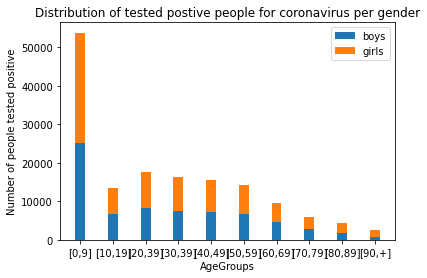

In [41]:
df_plot_gender(df_group)

